In [10]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
from scipy.signal import find_peaks, peak_prominences, peak_widths


In [11]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

# Maximum Accumulation

Grounding Line Plot - Amax = 5


In [12]:
gl_run_title_amax5 = str("Grounding Line Evolution Over Time - Max Accumulation = 5 m/yr")
amax5 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_16__15_13_21.pkl.gz"
with gzip.open(amax5, 'rb') as f:
    DATA_dict_amax5 = pickle.load(f)

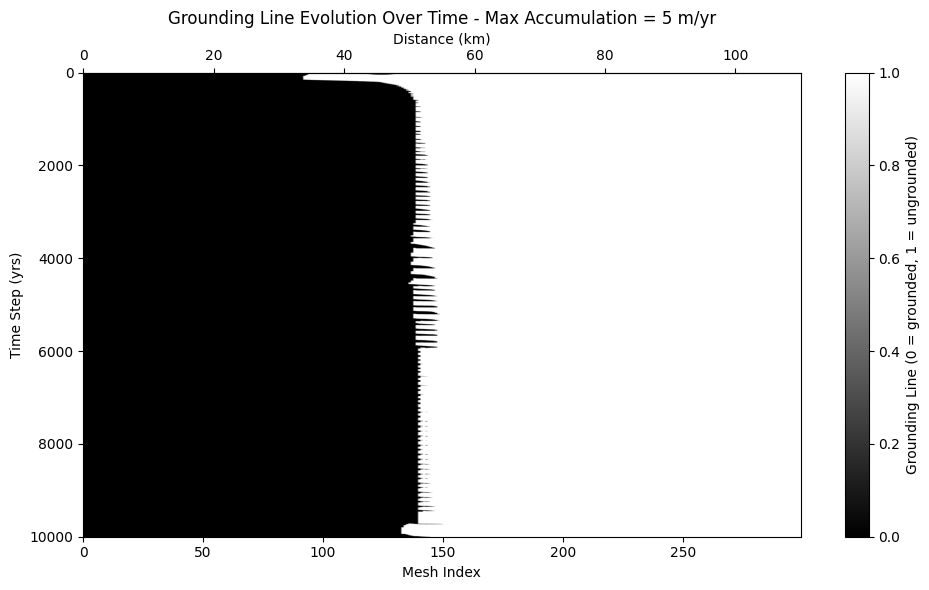

In [13]:
GL_dict = DATA_dict_amax5['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax5)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [14]:
gl_positions_amax5 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax5.append(idx)

gl_positions_amax5 = np.array(gl_positions_amax5)
GL_km_amax5 = mesh_index_to_km(gl_positions_amax5)



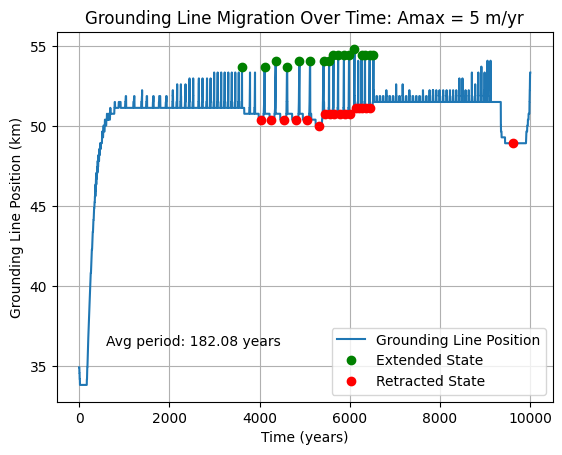

Mean cycle period: 182.08 years
[501.5696122  245.92848278 252.60618359 273.46352772 235.5396799
 301.31419611 120.49268564  98.20193177 103.0416729  127.62550512
 112.69708692 121.60835994 156.58010199  76.18826828 101.95987669
  84.52490585]
Mean advance amplitude: 54.23 km
[53.71237458 53.71237458 54.08026756 53.71237458 54.08026756 54.08026756
 54.08026756 54.08026756 54.44816054 54.44816054 54.44816054 54.44816054
 54.81605351 54.44816054 54.44816054 54.44816054 54.44816054]
Mean retreat amplitude: 50.63 km
[50.40133779 50.40133779 50.40133779 50.40133779 50.40133779 50.03344482
 50.76923077 50.76923077 50.76923077 50.76923077 50.76923077 50.76923077
 51.13712375 51.13712375 51.13712375 51.13712375 51.13712375 48.92976589]


In [15]:
peaks_amax5, _ = find_peaks(GL_km_amax5, prominence=3) 
troughs_amax5, _ = find_peaks(-GL_km_amax5, prominence=3)     
periods_amax5 = np.diff(np.array(time)[peaks_amax5])
adv_dists_amax5 = GL_km_amax5[peaks_amax5]
ret_dists_amax5 = GL_km_amax5[troughs_amax5]


plt.plot(time, GL_km_amax5, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax5], GL_km_amax5[peaks_amax5], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax5], GL_km_amax5[troughs_amax5], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax5):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax = 5 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax5):.2f} years")
print(periods_amax5)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax5):.2f} km")
print(adv_dists_amax5)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax5):.2f} km")
print(ret_dists_amax5)


Grounding Line Plot - Amax = 6


In [55]:
gl_run_title_amax6 = str("Grounding Line Evolution Over Time - Max Accumulation = 6 m/yr")
amax6 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_16__14_32_19.pkl.gz"
with gzip.open(amax6, 'rb') as f:
    DATA_dict_amax6 = pickle.load(f)

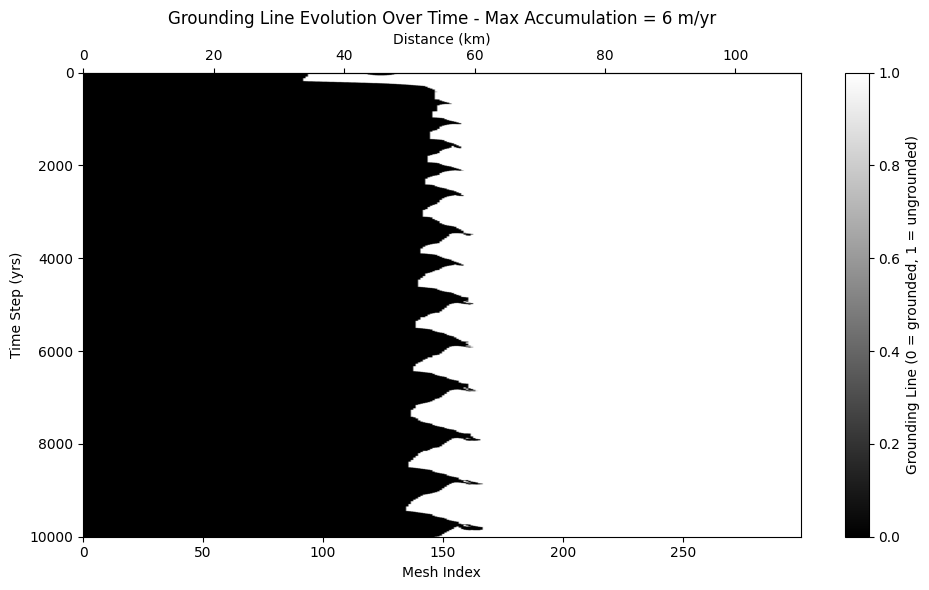

In [56]:
GL_dict = DATA_dict_amax6['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax6)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [58]:
gl_positions_amax6 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax6.append(idx)

gl_positions_amax6 = np.array(gl_positions_amax6)
GL_km_amax6 = mesh_index_to_km(gl_positions_amax6)



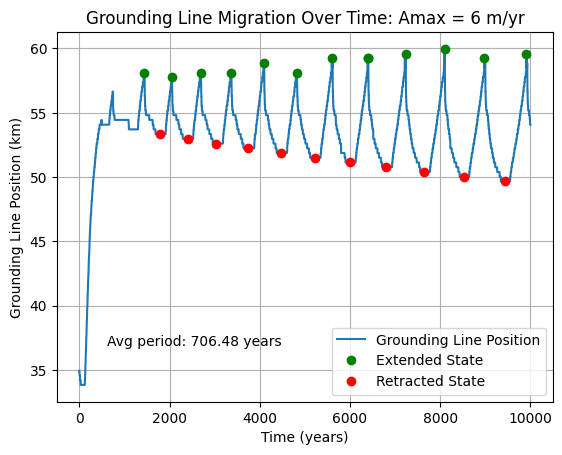

Mean cycle period: 706.48 years
[612.66647617 639.31512607 674.54851028 733.61269392 720.65963102
 777.66274421 795.11309274   9.57782899 833.94648599 866.66492986
 880.33453698 933.60409609]
Mean advance amplitude: 58.86 km
[58.1270903  57.75919732 58.1270903  58.1270903  58.86287625 58.1270903
 59.23076923 59.23076923 59.23076923 59.59866221 59.96655518 59.23076923
 59.59866221]
Mean retreat amplitude: 51.51 km
[53.34448161 52.97658863 52.60869565 52.24080268 51.8729097  51.50501672
 51.13712375 50.76923077 50.40133779 50.03344482 49.66555184]


In [59]:
peaks_amax6, _ = find_peaks(GL_km_amax6, prominence=3) 
troughs_amax6, _ = find_peaks(-GL_km_amax6, prominence=3)     
periods_amax6 = np.diff(np.array(time)[peaks_amax6])
adv_dists_amax6 = GL_km_amax6[peaks_amax6]
ret_dists_amax6 = GL_km_amax6[troughs_amax6]


plt.plot(time, GL_km_amax6, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax6], GL_km_amax6[peaks_amax6], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax6], GL_km_amax6[troughs_amax6], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax6):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax = 6 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax6):.2f} years")
print(periods_amax6)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax6):.2f} km")
print(adv_dists_amax6)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax6):.2f} km")
print(ret_dists_amax6)


Grounding Line Plot - Amax = 7


In [81]:
gl_run_title_amax7 = str("Grounding Line Evolution Over Time - Max Accumulation = 7 m/yr")
amax7 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_16__13_37_56.pkl.gz"
with gzip.open(amax7, 'rb') as f:
    DATA_dict_amax7 = pickle.load(f)

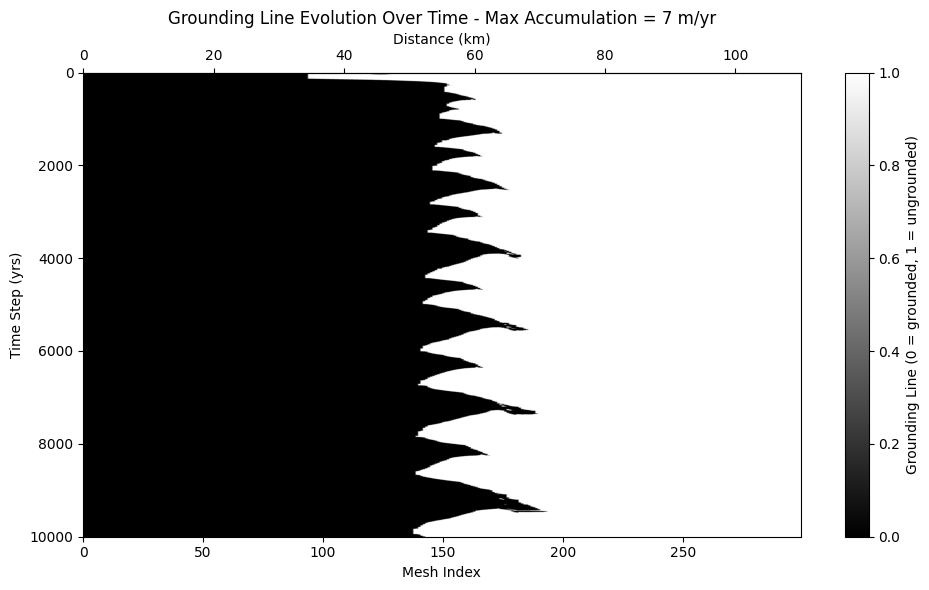

In [82]:
GL_dict = DATA_dict_amax7['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax7)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [83]:
gl_positions_amax7 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax7.append(idx)

gl_positions_amax7 = np.array(gl_positions_amax7)
GL_km_amax7 = mesh_index_to_km(gl_positions_amax7)



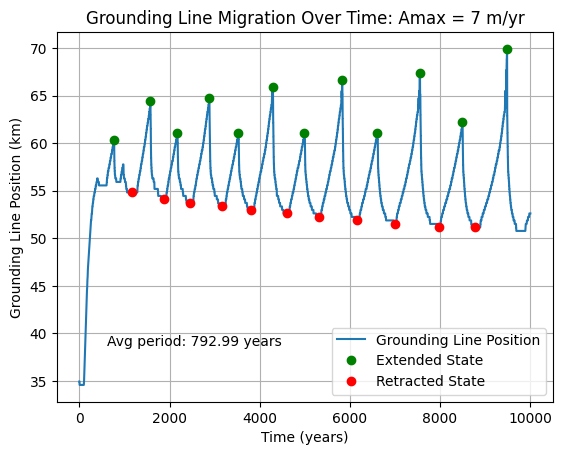

Mean cycle period: 792.99 years
[810.69220903 595.69132086 709.49029705 643.94588252 760.52828434
 706.46524477 836.26041301 780.08466833 944.20302351 946.60345946
 988.90497172]
Mean advance amplitude: 63.80 km
[60.33444816 64.3812709  61.07023411 64.74916388 61.07023411 65.85284281
 61.07023411 66.58862876 61.07023411 67.32441472 62.17391304 69.89966555]
Mean retreat amplitude: 52.68 km
[54.81605351 54.08026756 53.71237458 53.34448161 52.97658863 52.60869565
 52.24080268 51.8729097  51.50501672 51.13712375 51.13712375]


In [84]:
peaks_amax7, _ = find_peaks(GL_km_amax7, prominence=3) 
troughs_amax7, _ = find_peaks(-GL_km_amax7, prominence=3)     
periods_amax7 = np.diff(np.array(time)[peaks_amax7])
adv_dists_amax7 = GL_km_amax7[peaks_amax7]
ret_dists_amax7 = GL_km_amax7[troughs_amax7]


plt.plot(time, GL_km_amax7, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax7], GL_km_amax7[peaks_amax7], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax7], GL_km_amax7[troughs_amax7], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax7):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax = 7 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax7):.2f} years")
print(periods_amax7)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax7):.2f} km")
print(adv_dists_amax7)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax7):.2f} km")
print(ret_dists_amax7)


Grounding Line Plot - Amax = 8


In [86]:
gl_run_title_amax8 = str("Grounding Line Evolution Over Time - Max Accumulation = 8 m/yr")
amin16 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_03_14__14_04_13.pkl.gz"
with gzip.open(amin16, 'rb') as f:
    DATA_dict_amin16 = pickle.load(f)

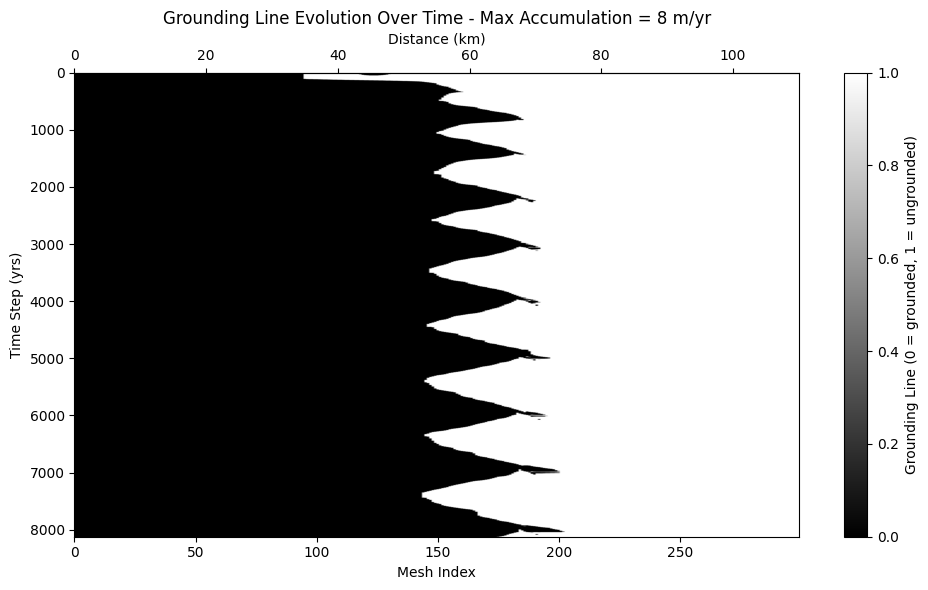

In [87]:
GL_dict = DATA_dict_amin16['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax8)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [70]:
gl_positions_amin16 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amin16.append(idx)

gl_positions_amin16 = np.array(gl_positions_amin16)
GL_km_amin16 = mesh_index_to_km(gl_positions_amin16)



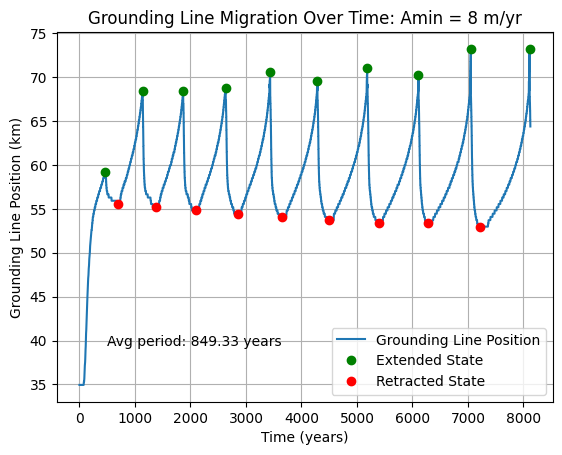

Mean cycle period: 849.33 years
[ 671.04104519  731.17664818  765.35723967  801.83053734  850.85569445
  897.86178343  923.5788195   943.37435896 1058.89407233]
Mean advance amplitude: 69.27 km
[59.23076923 68.42809365 68.42809365 68.79598662 70.63545151 69.53177258
 71.00334448 70.26755853 73.21070234 73.21070234]
Mean retreat amplitude: 54.16 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 53.34448161 52.97658863]


In [72]:
peaks_amin16, _ = find_peaks(GL_km_amin16, prominence=3) 
troughs_amin16, _ = find_peaks(-GL_km_amin16, prominence=3)     
periods_amin16 = np.diff(np.array(time)[peaks_amin16])
adv_dists_amin16 = GL_km_amin16[peaks_amin16]
ret_dists_amin16 = GL_km_amin16[troughs_amin16]


plt.plot(time, GL_km_amin16, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amin16], GL_km_amin16[peaks_amin16], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amin16], GL_km_amin16[troughs_amin16], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amin16):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amin = 8 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amin16):.2f} years")
print(periods_amin16)

print(f"Mean advance amplitude: {np.mean(adv_dists_amin16):.2f} km")
print(adv_dists_amin16)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amin16):.2f} km")
print(ret_dists_amin16)


Grounding Line Plot - Amax = 9


In [77]:
gl_run_title_amax9 = str("Grounding Line Evolution Over Time - Max Accumulation = 9 m/yr")
amax9 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_04_16__16_21_01.pkl.gz"
with gzip.open(amax9, 'rb') as f:
    DATA_dict_amax9 = pickle.load(f)

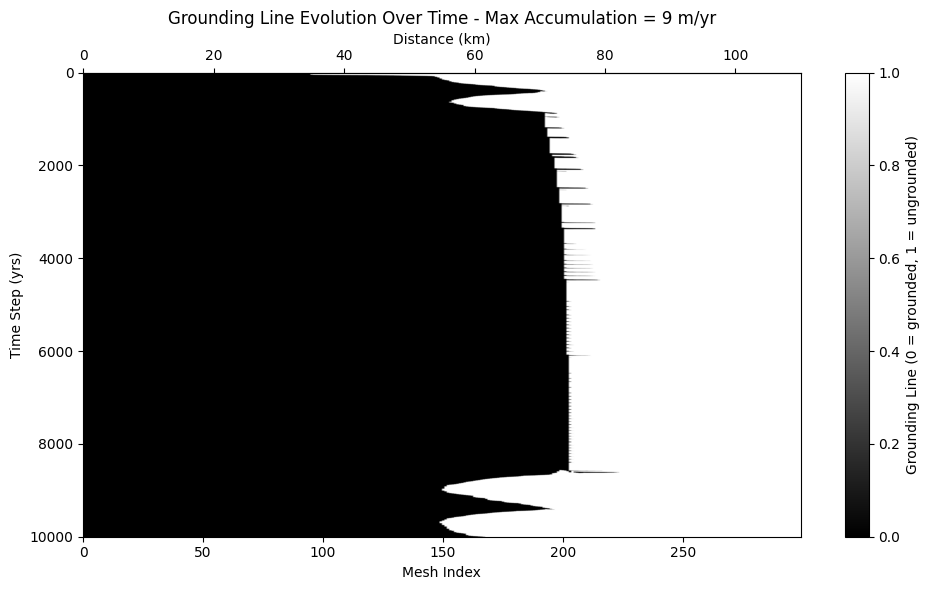

In [78]:
GL_dict = DATA_dict_amax9['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax9)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [79]:
gl_positions_amax9 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax9.append(idx)

gl_positions_amax9 = np.array(gl_positions_amax9)
GL_km_amax9 = mesh_index_to_km(gl_positions_amax9)



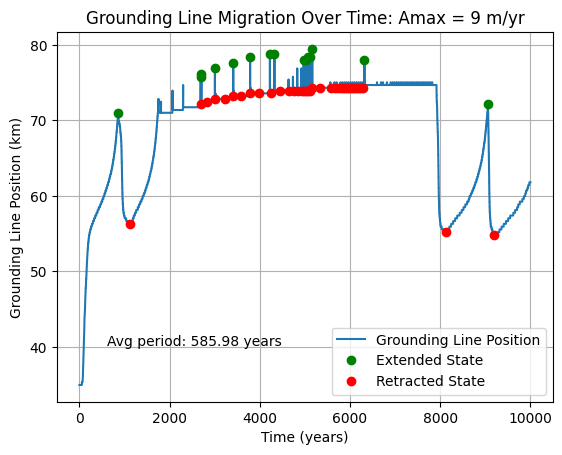

Mean cycle period: 585.98 years
[1831.09799912   16.57337245  299.31182765  406.07508377  374.53706408
  439.95523782   99.0601997   648.75028134   47.49335405   48.30994121
   46.81032772   47.86530732 1157.8185003  2740.00758083]
Mean advance amplitude: 77.04 km
[71.00334448 75.78595318 76.15384615 76.88963211 77.62541806 78.36120401
 78.72909699 78.72909699 77.99331104 77.99331104 78.36120401 78.36120401
 79.46488294 77.99331104 72.10702341]
Mean retreat amplitude: 72.44 km
[56.28762542 72.10702341 72.47491639 72.84280936 72.84280936 73.21070234
 73.21070234 73.57859532 73.57859532 73.57859532 73.94648829 73.94648829
 73.94648829 73.94648829 73.94648829 73.94648829 73.94648829 73.94648829
 73.94648829 74.31438127 74.31438127 74.31438127 74.31438127 74.31438127
 74.31438127 74.31438127 74.31438127 74.31438127 74.31438127 74.31438127
 74.31438127 74.31438127 74.31438127 74.31438127 74.31438127 74.31438127
 55.18394649 54.81605351]


In [80]:
peaks_amax9, _ = find_peaks(GL_km_amax9, prominence=3) 
troughs_amax9, _ = find_peaks(-GL_km_amax9, prominence=3)     
periods_amax9 = np.diff(np.array(time)[peaks_amax9])
adv_dists_amax9 = GL_km_amax9[peaks_amax9]
ret_dists_amax9 = GL_km_amax9[troughs_amax9]


plt.plot(time, GL_km_amax9, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax9], GL_km_amax9[peaks_amax9], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax9], GL_km_amax9[troughs_amax9], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax9):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax = 9 m/yr")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax9):.2f} years")
print(periods_amax9)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax9):.2f} km")
print(adv_dists_amax9)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax9):.2f} km")
print(ret_dists_amax9)


## Relationship Plots

In [90]:
## Climate Factor##
title_amax_cycles = str("Number of Cycles Produced  VS Maximum Accumulation")
amaxs = np.array([6,7,8])
amax_cycles = np.array([13, 14, 10])
amax_coeff = np.polyfit(amaxs,amax_cycles, 1)
p_amax = np.poly1d(amax_coeff)
amax_y_trend = p_amax(amaxs)
R_2_amax =r2_score(amax_cycles,p_amax(amaxs))


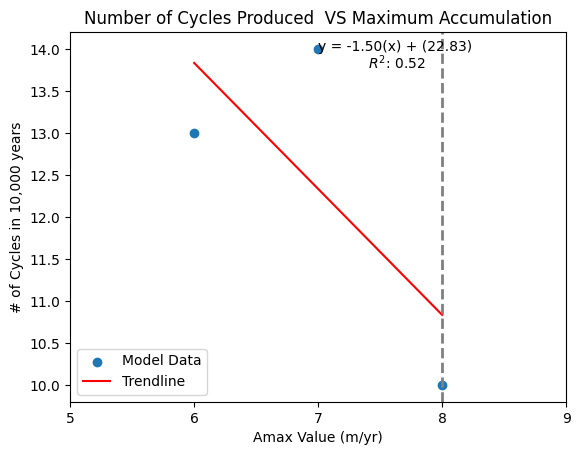

In [93]:
plt.scatter(amaxs, amax_cycles, label = 'Model Data')
plt.title(title_amax_cycles)
plt.plot(amaxs, amax_y_trend, color='red', label='Trendline')
plt.text(0.6, 0.9, f'$R^2$: {R_2_amax:.2f}', transform=plt.gca().transAxes)
plt.text(0.5, 0.95, f'y = {amax_coeff[0]:.2f}(x) + ({amax_coeff[1]:.2f})', transform=plt.gca().transAxes)
plt.axvline(x=8, color='gray', linestyle='--', linewidth=2)
plt.xlabel("Amax Value (m/yr)")
plt.ylabel("# of Cycles in 10,000 years")
plt.xticks(np.arange(5, 10, 1.0))
plt.legend()


Variations in Cycle Period


In [94]:
amaxs = np.array([6,7,8])

Period_list = [periods_amax6, periods_amax7, periods_amin16]

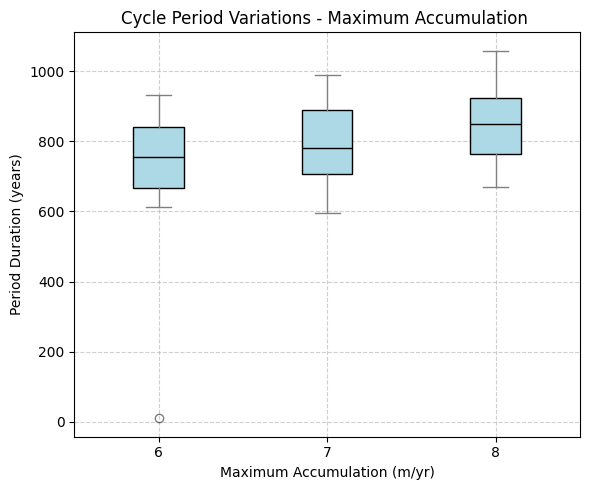

In [104]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(Period_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Cycle Period Variations - Maximum Accumulation ")
ax.set_ylabel("Period Duration (years)")
ax.set_xlabel("Maximum Accumulation (m/yr)")
ax.set_xticks(np.arange(1, len(amaxs) + 1))
ax.set_xticklabels(amaxs)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Variations in GL Extent - Advance 

In [96]:
amaxs = np.array([6,7,8])
ExtPos_list =  [adv_dists_amax6, adv_dists_amax7, adv_dists_amin16]


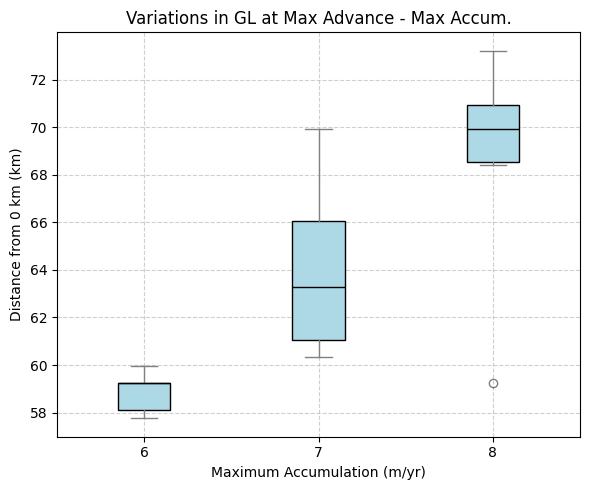

In [105]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in GL at Max Advance - Max Accum.")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Maximum Accumulation (m/yr)")
ax.set_xticks(np.arange(1, len(amaxs) + 1))
ax.set_xticklabels(amaxs)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Variations in GL Extent - Retreat 

In [98]:
amaxs = np.array([6,7,8])
RetPos_list =  [ret_dists_amax6, ret_dists_amax7, ret_dists_amin16]

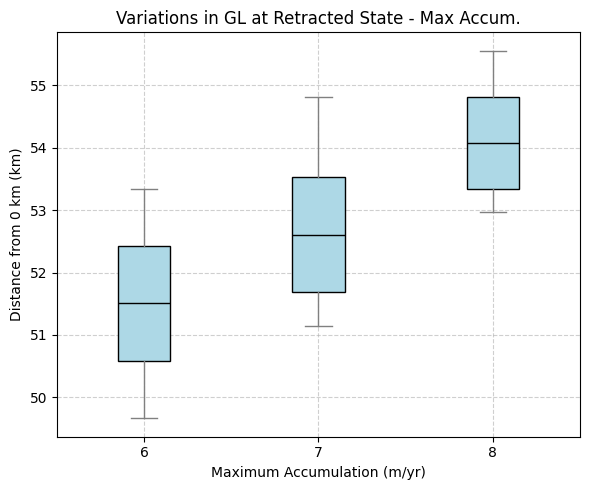

In [107]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in GL at Retracted State - Max Accum.")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Maximum Accumulation (m/yr)")
ax.set_xticks(np.arange(1, len(amaxs) + 1))
ax.set_xticklabels(amaxs)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()